In [9]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from datetime import datetime # библиотеки для подсчета времени
import time

In [10]:
# функция вычисления площади крон
def square(resim, trueim):
    x = 0
    for i in range (resim.shape[1]):
        for j in range (resim.shape[1]):
            if resim[0,i,j,0] == 1:
                x = x + 1
            else:
                continue
    k = x/((resim.shape[1])**2)      
    squ = k*(trueim.shape[0]*0.05)**2
    return(squ)

In [11]:
# загрузка обученной модели
loadmodel = tf.keras.models.load_model('checkpoint/hacknet_v2')

In [12]:
# загрузка изображения из памяти
img_path = r'data/dataset_test/1/images/1.jpg'

test_image = image.load_img(img_path, color_mode='rgb', target_size = (256, 256, 3))

img = test_image

test_image = np.expand_dims(test_image, axis = 0)

In [13]:
# подача изображения на вход нейронной сети с замером времени выполнения
start_time = datetime.now()
result = loadmodel.predict(test_image)
t = datetime.now() - start_time

In [14]:
print(f'Время обработки изображения = {t}')

Время обработки изображения = 0:00:00.145000


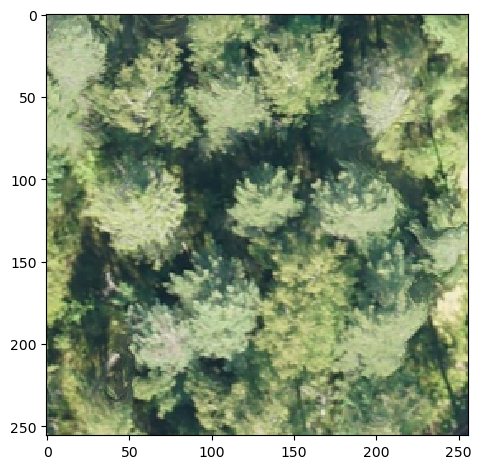

d:\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


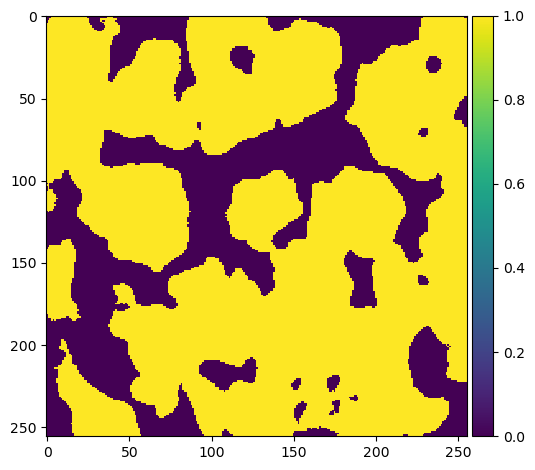

In [15]:
# вывод исходного и полученного изображения
resultt = (result > 0.5).astype(np.uint8)

imshow(np.squeeze(img))
plt.show()

imshow(np.squeeze(resultt))
plt.show()


In [16]:
# расчет площади покрытой кронами
image = imread(fname=img_path)        
square(resultt, image)
print(f"Площадь занимаемая кронами = {round(square(resultt, image),1)} м")


Площадь занимаемая кронами = 464.1 м


In [17]:
a = 2000**2 # пикселей в одном гектаре
print(f"Время обработки одного гектара = {(a/(256*256))*t}")



Время обработки одного гектара = 0:00:08.850098
